## Exploratory Data Analysis

In [1]:
import kagglehub

path = kagglehub.dataset_download("rmisra/imdb-spoiler-dataset")
# print("Path to dataset files:", path)

/home/ayush/anaconda3/envs/pp/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

movie_details = pd.read_json(path + "/IMDB_movie_details.json", lines=True)
reviews = pd.read_json(path + "/IMDB_reviews.json", lines=True)

In [3]:
print(reviews.info())
print(movie_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   r

In [4]:
reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [5]:
len(reviews)

573913

In [6]:
movie_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [7]:
# number of unique movies in the dataset
num_unique_movies = movie_details['movie_id'].nunique()
print(f"Number of unique movies in the dataset: {num_unique_movies}")

Number of unique movies in the dataset: 1572


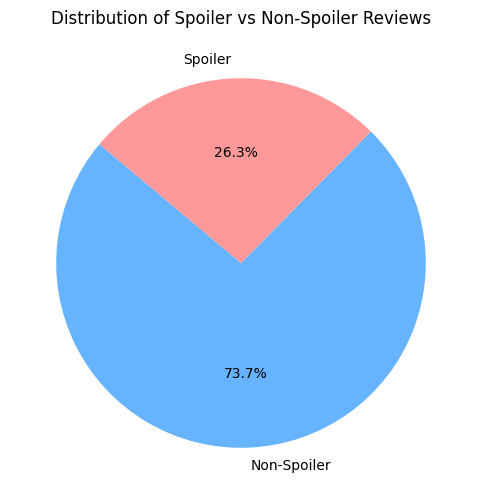

In [8]:
# spoiler distribution as pie chart
import matplotlib.pyplot as plt
spoiler_counts = reviews['is_spoiler'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(spoiler_counts, labels=['Non-Spoiler', 'Spoiler'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Spoiler vs Non-Spoiler Reviews')
plt.show()

## Load preprocessed data 
(processed in 02_preprocessing.ipynb)

In [9]:
movie_details_pp = pd.read_feather("../data/preprocessed_movie_details.feather")
reviews_pp = pd.read_feather("../data/preprocessed_reviews.feather")

In [10]:
movie_details_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


In [11]:
reviews_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [12]:
movie_details_pp.sample(10, random_state=234)

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
27,tt0108399,"[detroit, clarence, worley, go, movie, theater...",2h,"[Crime, Drama, Romance]",7.9,1993-09-10,"[comic, book, store, clerk, film, buff, claren..."
227,tt0482606,"[return, wed, reception, couple, stay, isolate...",1h 26min,"[Horror, Mystery, Thriller]",6.2,2008-05-30,"[kristen, mckay, liv, tyler, james, hoyt, scot..."
343,tt0186151,"[rare, atmospheric, phenomenon, allow, new, yo...",1h 58min,"[Crime, Drama, Mystery]",7.4,2000-04-28,"[october, frank, sullivan, new, york, city, fi..."
981,tt2293640,"[ever, since, dawn, time, minion, live, serve,...",1h 31min,"[Animation, Action, Adventure]",6.4,2015-07-10,"[movie, start, narration, minion, exist, since..."
505,tt1078940,"[dave, ronnie, jason, cynthia, joey, lucy, clo...",1h 53min,[Comedy],5.5,2009-10-09,"[movie, focus, couple, marry, two, young, kid,..."
326,tt5715874,"[untimely, death, year, old, martin, father, o...",2h 1min,"[Drama, Horror, Mystery]",7.3,2017-11-03,[]
1280,tt0468569,"[set, within, year, event, batman, begin, batm...",2h 32min,"[Action, Crime, Drama]",9.0,2008-07-18,"[movie, begin, gang, men, clown, mask, break, ..."
502,tt0151738,"[chicago, sun, time, copy, editor, josie, gell...",1h 47min,"[Comedy, Drama, Romance]",6.0,1999-04-09,"[josie, geller, draw, barrymore, highly, intel..."
1166,tt0101587,"[mitch, middle, age, big, city, radio, ad, sal...",1h 53min,[Comedy],6.7,1991-06-07,"[mitch, robbins, billy, crystal, best, friend,..."
585,tt0455944,"[equalizer, denzel, washington, play, mccall, ...",2h 12min,"[Action, Crime, Thriller]",7.2,2014-09-26,"[robert, mccall, denzel, washington, get, earl..."


In [13]:
reviews_pp.sample(10, random_state=234)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
244476,8 August 2016,tt1386697,ur68277297,False,"[know, wrong, critic, nowadays, jumpy, marvel,...",9,"[movie, amazing]"
569344,30 June 2000,tt0120655,ur0781795,False,"[funny, movie, see, long, time, kevin, smith, ...",8,"[hilarious, movie, great, cast, great, plot]"
194640,28 September 2013,tt0816711,ur46940562,False,"[caught, dvd, zombie, run, like, gazelle, even...",9,"[new, breed, zombie]"
393096,25 November 2005,tt0294870,ur2817149,True,"[far, movie, go, would, put, classification, b...",10,"[love, broadway, show, loved, movie, even]"
365388,18 June 2005,tt0369339,ur5492998,True,"[tom, cruise, play, hit, man, name, vincent, d...",8,"[good, movie]"
496412,4 March 2002,tt0103644,ur1240231,False,"[alien, good, movie, alien, almost, topped, mo...",5,"[ummmm, suck]"
244457,22 October 2016,tt1386697,ur66047103,False,"[suicide, squad, fun, time, movie, discard, ha...",8,"[fun, time, movie]"
458929,23 May 2008,tt1060277,ur19388312,False,"[blair, witch, project, enough, convince, plai...",1,"[stop, video, cam, movie, pleeeeeeze]"
74481,8 January 2016,tt1205489,ur55031674,False,"[think, people, get, use, high, budget, film, ...",7,"[could, better]"
303869,23 March 2002,tt0244244,ur1458307,False,"[weird, feel, movie, open, scene, great, first...",5,"[bore, plot, great, stunt]"
